# Exercise 4

Deep learning neural networks learn how to map inputs to outputs from examples in a training dataset. The purpose of exercise is to compare results of MLP prediction with raw, normalized and standardized input data.


In [1]:
## Import libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model, Sequential, clone_model
from keras.optimizers import SGD
#from matplotlib import pyplot
from numpy import mean
from numpy import std
import tensorflow as tf
from matplotlib import pyplot as plt
import statistics

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# Noted from Toni's comment in Teams (https://lifesaver.codes/answer/different-results-between-model-evaluate-and-model-predict-5140)
# If we were to use model.predict() later, it would require the shape to be array.
# Before reshaping it is a vector, but is now shaped to an array. I do it here just in case, as I am not using predict, only evaluate.
y = y.reshape(-1, 1)

In [2]:
# Split into training and test dataset, 70/30
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [3]:
# Define MLP using Keras Functional API
# Input layer with suitable amount of nodes
# Hidden layer with 25 nodes: activation='relu', kernel_initializer='he_uniform'
# Output layer 1 node (prediction), activation = 'linear'

inputs = Input(shape = (Xtrain.shape[1], ))
hidden = Dense(25, activation = 'relu', kernel_initializer='he_uniform')(inputs)
outputs = Dense(1, activation = 'linear', name = 'prediction')(hidden)

model = Model(inputs = inputs, outputs = outputs, name = "malli")

# Compile model with following options: 
# The mean squared error loss function will be used to optimize the model and 
# the stochastic gradient descent optimization algorithm
# lowered lr from 0.01 to 0.001 to get rid of nans
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
model.summary()

Model: "malli"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 25)                525       
_________________________________________________________________
prediction (Dense)           (None, 1)                 26        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


## Raw data as input

Repeat each 5 times and save the results

In [4]:
# When fitting the model, use epoch = 100

# Create dictonary for the model that will be fitted 5 times
fitted_models = {}

# Fit the model five times
for i in range(5):
    new_model = clone_model(model)
    new_model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
    fitted_models["history{0}".format(i)] = new_model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=100, verbose=0)

In [5]:
# Evaluate model: mse 

scores_raw = []

# Go through fitted_models -dictionary and evaluate all the models and print the loss (mse)
for key in fitted_models.keys():
    test_score_raw = fitted_models[key].model.evaluate(Xtest, ytest)
    print("Test loss (mse):", test_score_raw)
    scores_raw.append(test_score_raw)

10/10 [==============================] - 0s 603us/step - loss: 1.9824
Test loss (mse): 1.982419490814209
10/10 [==============================] - 0s 801us/step - loss: 2.1757
Test loss (mse): 2.1757187843322754
10/10 [==============================] - 0s 603us/step - loss: 0.3593
Test loss (mse): 0.35928335785865784
10/10 [==============================] - 0s 605us/step - loss: 1.0803
Test loss (mse): 1.0802700519561768
10/10 [==============================] - 0s 600us/step - loss: 3.5491
Test loss (mse): 3.5490705966949463


In [6]:
fitted_models.keys()

dict_keys(['history0', 'history1', 'history2', 'history3', 'history4'])

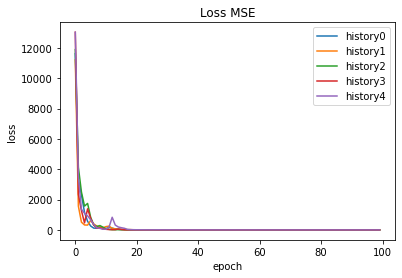

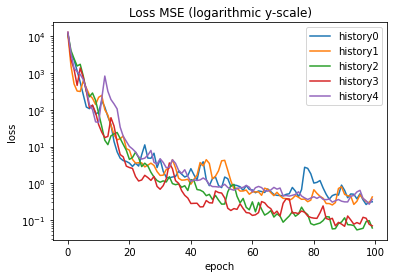

In [7]:
# Plot loss during training

for key in fitted_models.keys():
    plt.plot(fitted_models[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss MSE')
plt.show()

# Logaritmic is more informative print here
for key in fitted_models.keys():
    plt.plot(fitted_models[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss MSE (logarithmic y-scale)')
plt.show()

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

## Normalized data (MinMaxScaler)
Repeat each 5 times and save the results

In [8]:
# Normalize data

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)


# Seems Mika has used this as one source: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
# Explains the order more easily https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b
# https://statisticsbyjim.com/basics/normal-distribution/

In [9]:
# Fit model: epoch = 100
# Implementation comes to this cell

# Create dictonary for the model that will be fitted 5 times
fitted_models_normalized = {}

# Fit the model five times
for i in range(5):
    new_model = clone_model(model)
    new_model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
    fitted_models_normalized["history{0}".format(i)] = new_model.fit(Xtrain_scaled, ytrain, validation_data=(Xtest_scaled, ytest), epochs=100, verbose=0)

In [10]:
# Evaluate model: mse 

scores_normalized = []

# Go through fitted_models_normalized -dictionary and evaluate all the models and print the loss (mse)
for key in fitted_models_normalized.keys():
    test_score_normalized = fitted_models_normalized[key].model.evaluate(Xtest_scaled, ytest)
    print("Test loss (mse):", test_score_normalized)
    scores_normalized.append(test_score_normalized)

10/10 [==============================] - 0s 700us/step - loss: 23079.5566
Test loss (mse): 23079.556640625
10/10 [==============================] - 0s 600us/step - loss: 23082.0781
Test loss (mse): 23082.078125
10/10 [==============================] - 0s 600us/step - loss: 23080.3555
Test loss (mse): 23080.35546875
10/10 [==============================] - 0s 600us/step - loss: 23079.9375
Test loss (mse): 23079.9375
10/10 [==============================] - 0s 522us/step - loss: 23080.3574
Test loss (mse): 23080.357421875


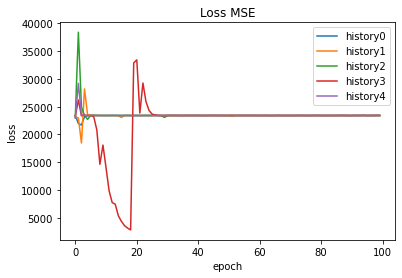

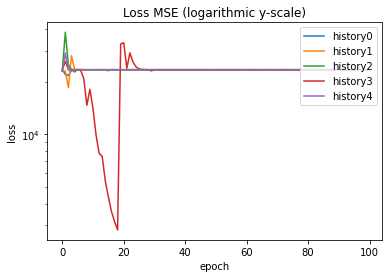

In [11]:
# Plot loss during training

for key in fitted_models_normalized.keys():
    plt.plot(fitted_models_normalized[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss MSE')
plt.show()


for key in fitted_models_normalized.keys():
    plt.plot(fitted_models_normalized[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss MSE (logarithmic y-scale)')
plt.show()


## Standardized data
Repeat each 5 times and save the results

In [12]:
# Standardize data

sscaler = StandardScaler()
Xtrain_sscaled = sscaler.fit_transform(Xtrain)
Xtest_sscaled = sscaler.transform(Xtest)

In [13]:
# Fit model: epoch = 100
# Create dictonary for the model that will be fitted 5 times
fitted_models_standardized = {}

# Fit the model five times
for i in range(5):
    new_model = clone_model(model)
    new_model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.001, momentum=0.9))
    fitted_models_standardized["history{0}".format(i)] = new_model.fit(Xtrain_sscaled, ytrain, validation_data=(Xtest_sscaled, ytest), epochs=100, verbose=0)

In [14]:
# Evaluate model: mse 

scores_standardized = []

# Go through fitted_models_standardized -dictionary and evaluate all the models and print the loss (mse)
for key in fitted_models_standardized.keys():
    test_score_standardized = fitted_models_standardized[key].model.evaluate(Xtest_sscaled, ytest)
    print("Test loss (mse):", test_score_standardized)
    scores_standardized.append(test_score_standardized)

10/10 [==============================] - 0s 701us/step - loss: 5.6261
Test loss (mse): 5.626077651977539
10/10 [==============================] - 0s 699us/step - loss: 5.3590
Test loss (mse): 5.359002590179443
10/10 [==============================] - 0s 600us/step - loss: 1.4426
Test loss (mse): 1.4426120519638062
10/10 [==============================] - 0s 800us/step - loss: 4.2911
Test loss (mse): 4.2910614013671875
10/10 [==============================] - 0s 607us/step - loss: 0.0411
Test loss (mse): 0.04113469272851944


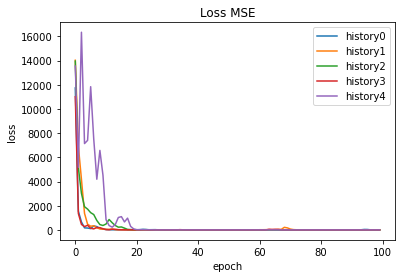

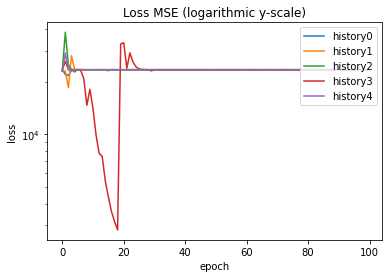

In [15]:
# Plot loss during training

for key in fitted_models_standardized.keys():
    plt.plot(fitted_models_standardized[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss MSE')
plt.show()

for key in fitted_models_standardized.keys():
    plt.plot(fitted_models_normalized[key].history['loss'], label = key)
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log', base = 10)
plt.title('Loss MSE (logarithmic y-scale)')
plt.show()

## Results

Calculate the mean and variance for raw, normalized and standardization methods. 

Interpreted from Teams-discussion: Calculate mean and variance of loss within test set that was saved in the history.

In [16]:
print(f"Raw data - mean: {statistics.mean(scores_raw)} variance: {statistics.variance(scores_raw)}")
print(f"Normalized data - mean: {statistics.mean(scores_normalized)} variance: {statistics.variance(scores_normalized)}")
print(f"Standardized data - mean: {statistics.mean(scores_standardized)} variance: {statistics.variance(scores_standardized)}")

Raw data - mean: 1.829352456331253 variance: 1.4557643088356629
Normalized data - mean: 23080.45703125 variance: 0.9321994781494141
Standardized data - mean: 3.351977677643299 variance: 6.1722290740641705


In [17]:
# Notes for me, please ignore

## Testirimpsu
# for i in range(5):
#     fitted_models["history{0}".format(i)] = i
#    
# for i in fitted_models.keys():
#    print(i)
#    print(fitted_models[i])

## check name of the keys to find out what to refer to
# print(history.history.keys())